# Data processing, analysis, and visualisation source code  
Plots are saved to results/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations

df = pd.read_csv('../data/reed_uk_data_analyst_skills.csv')

In [2]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Data shape: (1528, 6)

First 5 rows:
                  job_title                                            job_url  \
0             Data Analyst  https://www.reed.co.uk/jobs/data-analyst/54606...   
1      Junior Data Analyst  https://www.reed.co.uk/jobs/junior-data-analys...   
2  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   
3   Principal Data Analyst  https://www.reed.co.uk/jobs/principal-data-ana...   
4  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   

                    location              job_type  \
0                     London  Permanent, full-time   
1           Chertsey, Surrey  Permanent, full-time   
2    Stafford, Staffordshire  Permanent, full-time   
3                     London  Permanent, full-time   
4  Trafford Park, Lancashire  Permanent, full-time   

                        salary                          skills  
0           Competitive salary  power bi, python, sql, tableau  
1           Competit

In [3]:
print("\nUnique job titles:\n", df['job_title'].value_counts())
print("\nUnique locations:\n", df['location'].value_counts())
print("\nUnique job types:\n", df['job_type'].value_counts())
print("\nUnique salary entries:\n", df['salary'].value_counts())

print("\nNumber of 'Not specified' entries:")
print(f"Salary: {len(df[df['salary'] == 'Not specified'])}")
print(f"Location: {len(df[df['location'] == 'Not specified'])}")
print(f"Job type: {len(df[df['job_type'] == 'Not specified'])}")


Unique job titles:
 job_title
Data Analyst                                   140
Trainee Software Developer                      99
Data Analyst Trainee                            97
Web Developer Trainee                           91
Data Science Trainee                            90
                                              ... 
Growth Analyst                                   1
Financial Planning Analyst                       1
CRM Analyst                                      1
Interim Finance Analyst                          1
Financial Planning &amp; Analysis Assistant      1
Name: count, Length: 605, dtype: int64

Unique locations:
 location
London                                460
Manchester, Lancashire                 58
Leeds, West Yorkshire                  39
Birmingham, West Midlands (County)     33
City of London, London                 24
                                     ... 
Middleton, Manchester, Lancashire       1
Tadworth, Surrey                        1
Chel

## Skills analysis

In [4]:
# powerbi to power bi
df['skills'] = df['skills'].str.replace(r'\bpowerbi\b', 'power bi', case=False, regex=True)

def split_skills(skills_text):
    return [skill.strip() for skill in str(skills_text).split(',')]

df['skills_list'] = df['skills'].apply(split_skills)
print(df[['skills', 'skills_list']].head())

                           skills                       skills_list
0  power bi, python, sql, tableau  [power bi, python, sql, tableau]
1                 excel, power bi                 [excel, power bi]
2            excel, power bi, sql            [excel, power bi, sql]
3            python, sql, tableau            [python, sql, tableau]
4                 excel, power bi                 [excel, power bi]


In [5]:
# Count occurrences of each skill
all_skills = []
for skills in df['skills_list']:
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

skills_freq_df = pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Frequency'])
print(skills_freq_df)

         Skill  Frequency
0       python        818
1          sql        776
2        excel        683
3     power bi        440
4      tableau        417
5   javascript        298
6            r         75
7          sas         46
8         java         22
9        spark         17
10      matlab         10
11         cpp          8
12        qlik          6
13       swift          5
14       scala          5


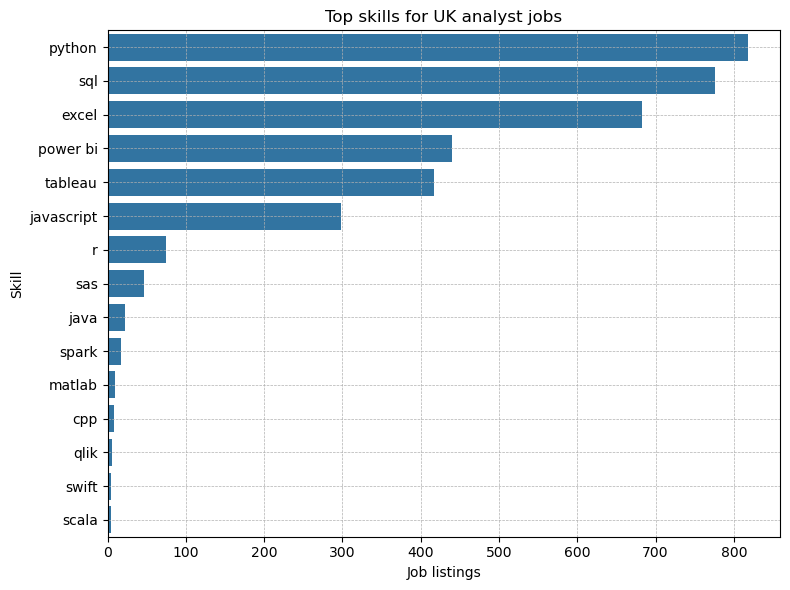

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(data=skills_freq_df, x='Frequency', y='Skill')
plt.title('Top skills for UK analyst jobs')
plt.xlabel('Job listings')
plt.ylabel('Skill')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.savefig('../results/top_skills.png', dpi=300)
plt.show()

## Job type analysis

employment_category
Permanent        1351
Non-permanent     177
Name: count, dtype: int64


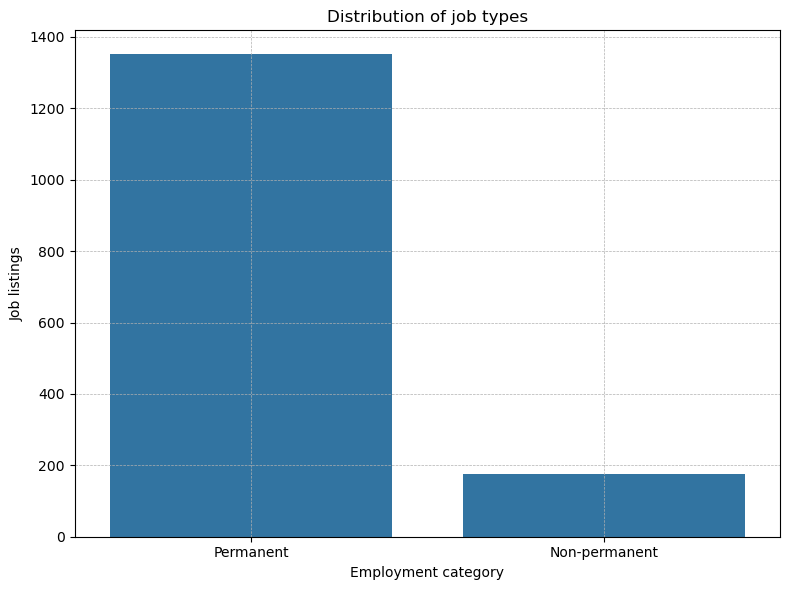

In [7]:
# Permanent vs non permanent (contract/temporary)
df['employment_category'] = df['job_type'].apply(lambda x: 'Non-permanent' if ('Contract' in x or 'Temporary' in x) else 'Permanent')

print(df['employment_category'].value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(data=df['employment_category'].value_counts())
plt.title('Distribution of job types')
plt.xlabel('Employment category')
plt.ylabel('Job listings')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.savefig('../results/job_type_distribution.png', dpi=300)
plt.show()

## Location analysis

In [8]:
# Handles variants of London to just London
is_london = df['location'].str.contains('London', case=False, na=False)
df.loc[is_london, 'location_clean'] = 'London'

# Takes the first part of the location string (main city)
# "Stoke-on-Trent, Staffordshire" become "Stoke-on-Trent"
df.loc[~is_london, 'location_clean'] = df.loc[~is_london, 'location'].str.split(',', n=1).str[0].str.strip()

# Handles variants of business park and industrial park to just the city
park_estate_pattern = r'\s*(Business Park|Industrial Park)$'
df['location_clean'] = df['location_clean'].str.replace(park_estate_pattern, '', regex=True, case=False).str.strip()

# Handles variants of England to just England
is_england_region = df['location_clean'].str.contains('England', case=False, na=False)
df.loc[is_england_region, 'location_clean'] = 'England (region)'

# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None) 
# print(len(df['location_clean']))
# print("\nCleaned locations:\n", df['location_clean'].value_counts())

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

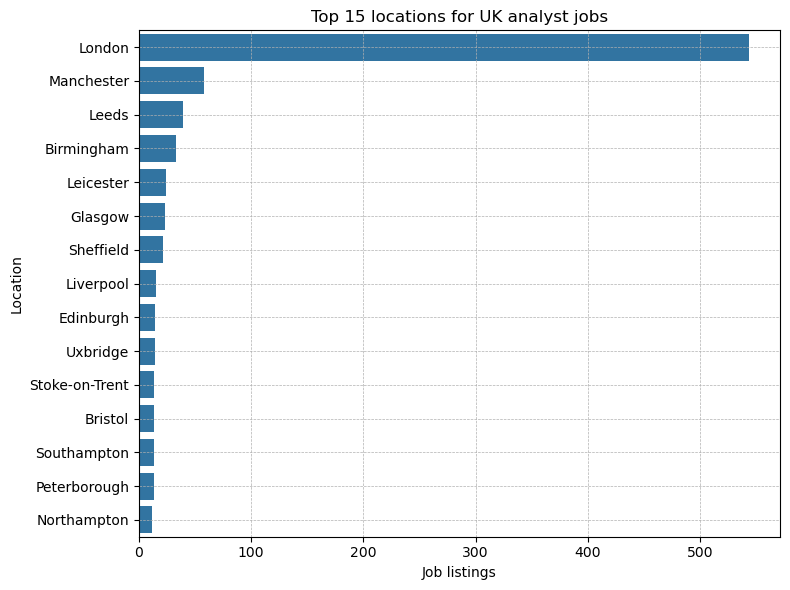

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df['location_clean'].value_counts().head(15).index, x=df['location_clean'].value_counts().head(15).values)
plt.title('Top 15 locations for UK analyst jobs')
plt.ylabel('Location')
plt.xlabel('Job listings')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.savefig('../results/top_locations.png', dpi=300)
plt.show()

## Salary analysis

In [10]:
# Clean salary by removing the extra text such as inc benefits...
df['salary_clean'] = df['salary'].str.extract(r'(.*?(?:per annum|per day|per hour|Competitive salary|Not specified|Salary negotiable|Salary not specified))')


# salary_type column with "per annum specified" or "others" (per annum for analysis, only british pound is used)
df['salary_type'] = np.where((df['salary_clean'].str.contains('per annum', case=False)) & (df['salary_clean'].str.contains('£')), 'per annum specified', 'others')


# Extract all numbers from salary strings
numbers = df['salary_clean'].str.extractall(r'£?([\d,]+(?:\.\d+)?)')[0].str.replace(',', '').astype(float)

grouped_numbers = numbers.groupby(level=0).agg(list)

# per annum averages
# if single number use that, if two numbers take mean
df['annum_avg'] = grouped_numbers.apply(lambda x: x[0] if len(x) == 1 else sum(x)/2 if len(x) == 2 else None)

# annum_avg only for per annum specified, others are NaNs
df['annum_avg'] = df['annum_avg'].where(df['salary_type'] == 'per annum specified')

valid_annual_salaries = df['annum_avg'].dropna()

print("Summary statistics for per annum")
print(valid_annual_salaries.describe())
print("\nMedian per annum salary:", valid_annual_salaries.median())

# Highest salary
highest_salary_row = df.loc[df['annum_avg'].idxmax()]
print("\nHighest salary row:\n", highest_salary_row)

# Lowest salary
lowest_salary_row = df.loc[df['annum_avg'].idxmin()]
print("\nLowest salary row:\n", lowest_salary_row)


# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None) 

# print(len(df['salary_clean']))
# print(df['salary_clean'].value_counts())
# print(df['salary_type'].value_counts())
# print(df['annum_avg'].value_counts().sort_index(ascending=False))

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

Summary statistics for per annum
count      1093.000000
mean      44219.675252
std       19861.637757
min       18000.000000
25%       30500.000000
50%       40000.000000
75%       52500.000000
max      380000.000000
Name: annum_avg, dtype: float64

Median per annum salary: 40000.0

Highest salary row:
 job_title                         MS Dynamics 365 CE Solution Architects
job_url                https://www.reed.co.uk/jobs/ms-dynamics-365-ce...
location                                                          London
job_type                                            Permanent, full-time
salary                                      £60,000 - £700,000 per annum
skills                                                   javascript, sql
skills_list                                            [javascript, sql]
employment_category                                            Permanent
location_clean                                                    London
salary_clean                          

### Competitive salary analysis: what does competitive salary mean?

In [11]:
# Filter jobs with "Competitive salary"
competitive_jobs = df[df['salary_clean'] == "Competitive salary"]
print(f"Number of 'Competitive salary' job listings: {len(competitive_jobs)}")

# Get top skills in competitive salary jobs
competitive_skills = []
for skills in competitive_jobs['skills_list']:
    competitive_skills.extend(skills)

top_skills = [skill for skill, _ in Counter(competitive_skills).most_common(5)]
print(f"\nTop 5 skills in 'Competitive salary' jobs: {top_skills}")

# Find jobs with similar skills that have specified salaries (per annum)
similar_jobs = df[(df['salary_type'] == 'per annum specified') & (df['skills_list'].apply(lambda x: any(skill in x for skill in top_skills)))]
print("\nEstimated per annum salary for 'Competitive salary' jobs:", similar_jobs['annum_avg'].median())

Number of 'Competitive salary' job listings: 164

Top 5 skills in 'Competitive salary' jobs: ['sql', 'power bi', 'python', 'tableau', 'excel']

Estimated per annum salary for 'Competitive salary' jobs: 40000.0


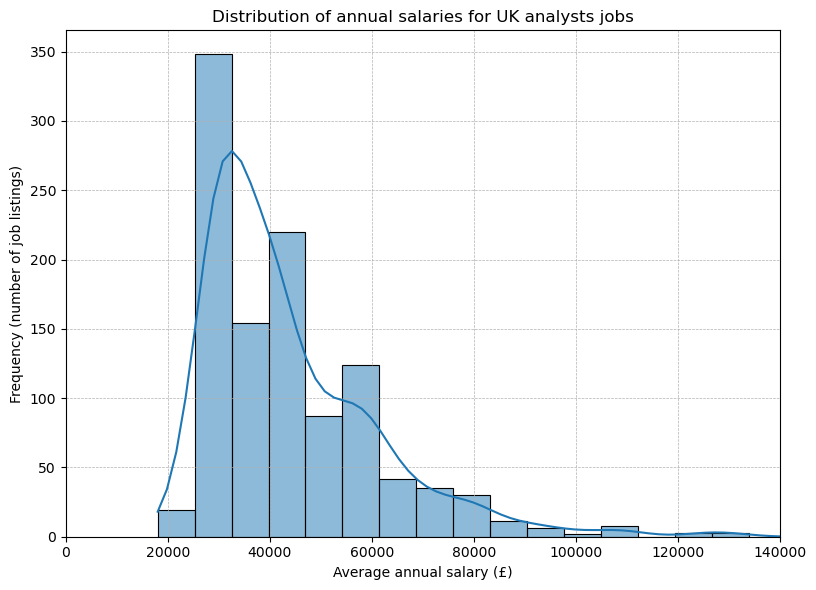

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(valid_annual_salaries, bins=50, kde=True)
plt.title('Distribution of annual salaries for UK analysts jobs')
plt.xlabel('Average annual salary (£)')
plt.ylabel('Frequency (number of job listings)')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.xlim(0, 140000)
plt.savefig('../results/salary_distribution.png', dpi=300)
plt.show()

## Multivariate analysis

### Salary vs skills

         Skill  Median salary   Mean salary  Job count
14       scala        90000.0  87500.000000          3
9        spark        80000.0  71500.000000          5
8         java        65000.0  74115.384615         13
6            r        60000.0  59659.397059         51
10      matlab        60000.0  55777.777778          9
11         cpp        60000.0  65312.500000          8
7          sas        57500.0  57989.181818         44
12        qlik        50000.0  43833.333333          3
13       swift        47500.0  49875.000000          4
1          sql        45000.0  51186.549892        461
3     power bi        45000.0  49644.988347        236
2        excel        40000.0  42185.901589        472
4      tableau        40000.0  43691.712629        194
0       python        30500.0  42008.306326        577
5   javascript        30500.0  32377.162630        289


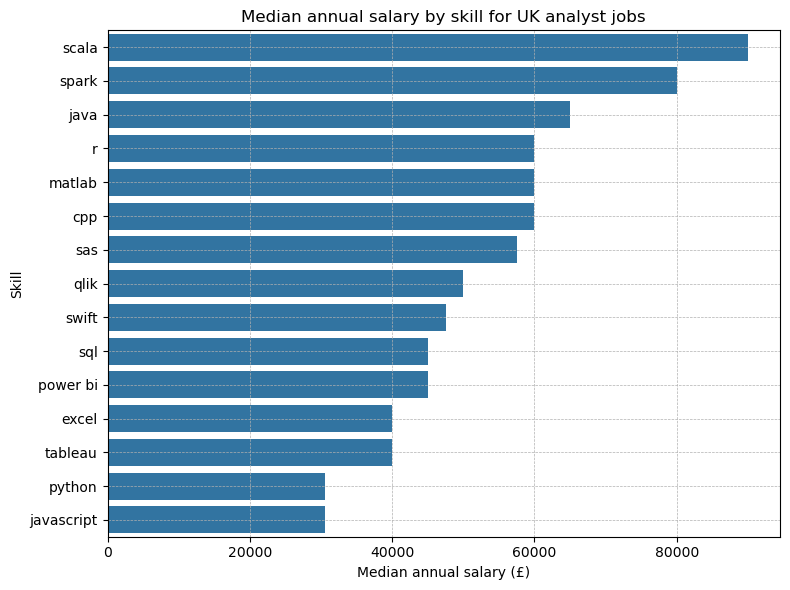

In [13]:
skills_salary = []

all_skills = skills_freq_df['Skill'].tolist()

for skill in all_skills:
    
    has_skill = df['skills_list'].apply(lambda x: skill in x)
    skill_salaries = df.loc[has_skill, 'annum_avg'].dropna()
    
    # Median , mean, and job count
    median_salary = skill_salaries.median()
    mean_salary = skill_salaries.mean()
    count = len(skill_salaries)
    
    skills_salary.append({
        'Skill': skill,
        'Median salary': median_salary,
        'Mean salary': mean_salary,
        'Job count': count
    })

# Convert to df and sort by median salary
skills_salary_df = pd.DataFrame(skills_salary)
skills_salary_df = skills_salary_df.sort_values(by='Median salary', ascending=False)


print(skills_salary_df[['Skill', 'Median salary', 'Mean salary', 'Job count']])

plt.figure(figsize=(8, 6))
sns.barplot(x='Median salary', y='Skill', data=skills_salary_df)
plt.title('Median annual salary by skill for UK analyst jobs')
plt.xlabel('Median annual salary (£)')
plt.ylabel('Skill')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.savefig('../results/salary_vs_skill.png', dpi=300)
plt.show()


### Location vs skills

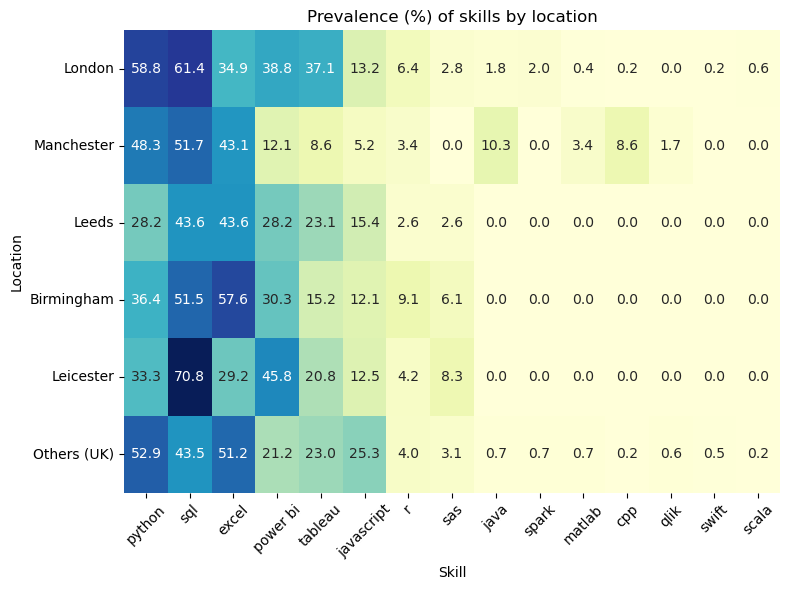

In [14]:
top_5_locations = df['location_clean'].value_counts().head(5).index.tolist()
all_skills = skills_freq_df['Skill'].tolist()

# Store skills by location
skill_location_matrix = pd.DataFrame(index=top_5_locations + ['Others (UK)'], columns=all_skills, dtype=float)

# Top 5 locations
for location in top_5_locations:
    location_jobs = df[df['location_clean'] == location]
    total_jobs = len(location_jobs)
    
    for skill in all_skills:
        skill_count = sum(location_jobs['skills_list'].apply(lambda x: skill in x))
        percentage = (skill_count / total_jobs) * 100 
        skill_location_matrix.loc[location, skill] = percentage

# Other locations
other_locations_jobs = df[~df['location_clean'].isin(top_5_locations)]
total_other_jobs = len(other_locations_jobs)

for skill in all_skills:
    skill_count = sum(other_locations_jobs['skills_list'].apply(lambda x: skill in x))
    percentage = (skill_count / total_other_jobs) * 100
    skill_location_matrix.loc['Others (UK)', skill] = percentage


plt.figure(figsize=(8,6))
sns.heatmap(skill_location_matrix, annot=True, fmt='.1f', cbar=False, cmap='YlGnBu')
plt.title('Prevalence (%) of skills by location')
plt.ylabel('Location')
plt.xlabel('Skill')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../results/location_vs_skill.png', dpi=300)
plt.show()

### Skills combinations


Top 10 most frequent skill pairs:
           Skill pair  Frequency
0         python, sql        481
1        sql, tableau        379
2     python, tableau        327
3          excel, sql        320
4       power bi, sql        318
5  javascript, python        285
6      excel, tableau        245
7       excel, python        231
8   power bi, tableau        199
9    power bi, python        173


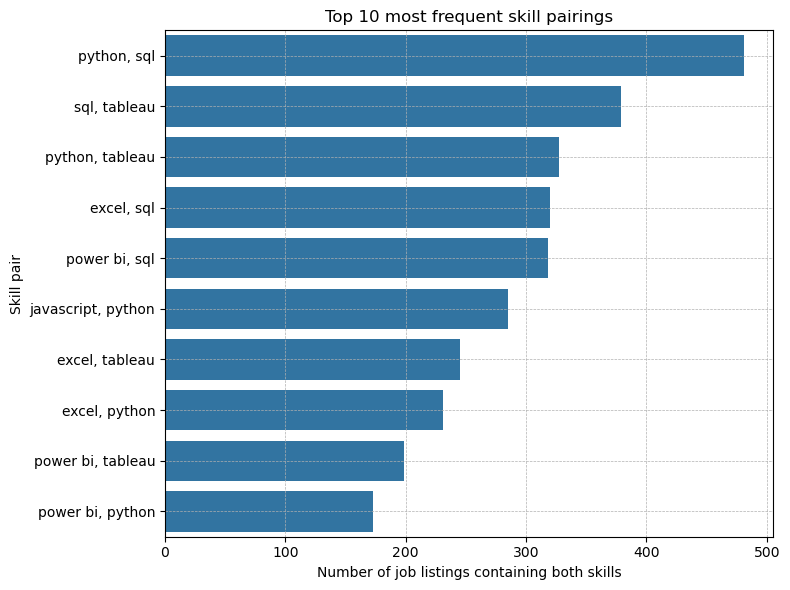

In [15]:
skills_for_combo = skills_freq_df['Skill'].tolist()

pair_counts = Counter()
total_jobs = len(df)

# Iterate through each job's skill list
for skill_list in df['skills_list']:
    present_target_skills = [s for s in skill_list if s in skills_for_combo]
    for pair in combinations(sorted(present_target_skills), 2):
        pair_counts[pair] += 1

# Get top 10 pairs
pair_counts_df = pd.DataFrame(pair_counts.most_common(10), columns=['Skill pair', 'Frequency'])
# Clean up the skill pair format
pair_counts_df['Skill pair'] = pair_counts_df['Skill pair'].apply(lambda x: f'{x[0]}, {x[1]}')


print("\nTop 10 most frequent skill pairs:")
print(pair_counts_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=pair_counts_df, x='Frequency', y='Skill pair')
plt.title('Top 10 most frequent skill pairings')
plt.xlabel('Number of job listings containing both skills')
plt.ylabel('Skill pair')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.savefig('../results/skills_combinations.png', dpi=300)
plt.show()